# Olympic Data Analysis using pyspark

## Capstone project -pyspark
**By Harsha Veena on 9:7:2022** 
## Introduction:
Olympic data is about winners information of different athletes from different country in their sport/game and their medals i particular year.we have 8618 winners information.
            In this project, we are going to see the Olympics analysis using Python. The modern Olympic Games or Olympics are leading international sports events featuring summer and winter sports competitions in which thousands of athletes from around the world participate in a variety of competitions. The Olympic Games are considered the world’s foremost sports competition with more than 200 nations participating.
         The total number of events in the Olympics is 339 in 33 sports. And for every event there are winners. Therefore various data is generated.So, by using Python we will analyze this data.We have **10 attributes with 8618 athletes** data.

our attributes contain information like mention in following table:

|information type|attributes|
|--|--|
|personal| name, age|
|region| country|
|tenure|year|
|summary|sports,Date_Given,total_medal|
|medal|gold,silver,bronze|


**Data Description**
1. **Name** is name of athlete, which is a string, **object** datatype.
2. **age** is at which age, athlete won that, which can be continuous value, **float** datatype.
3. **year** is which year they won of olympix, they won medal, which is specific umber, disrete **int** datatype.
4. **Date_Given** on that date, they won medal, which should be in date format.
5. **sports** is in which game they playes & won, which is unique string, so **object**, but we keep in **category** to reduce memory usage.
6. **country** is from which country they represents, which is unique string or **object**, but we convert to **category** to reduce memory.
7. **gold_medal** is athlete won number of gold medals, which is **discrete** number, so **int** format.
8. **silver_medal** is the athlete won number of silver medals, which is **discrete** number, so **int** datatype.
9. **brone_medal** is the athlete won number of bronze medals, which is **discrete** number , so **int** format.
10. **total_medal** is the athlete won number of total medals, which is **discrete** number, so **int** format.

## Objective:
Our aim is to analyse given olympic data by statistically,visually and apply transformation whereever necessary and get insights from data  by answering follwong questions

1. Write PySpark code to read the olympix_data.csv file
2. Write PySpark code to print the Olympic Sports/games in the dataset.
3. Write PySpark code to plot the total number of medals in  each Olympic Sport/game
4. Sort the result based on the total number of medals.
5. Find the total number of medals won by each country in swimming.
6. Find the total number of medals won by each country in Skeleton.
7. Find the number of medals that the US won yearly.
8. Find the total number of medals won by each country.
9. Who was the oldest athlete in the olympics? 
10. Which country was he/she from?

## Data Collection:
Data was downloaded from odin school LMS portal and saved in local computer.Our data is in csv format. we need to convert to spark dataframe to analyze. so first we need to install pyspark & create spark session to analyse data. we need to import pandas,matplotlib,seaborn for plots, .

In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 55.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=fb9c85f3d93cb4a0646552b001b4a4632880a9fb4fee488c0f444e1a67f08b66
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
# initializing pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
conf= SparkConf().setAppName('capstone')
sc=SparkContext(conf=conf)
spark=SparkSession.builder.appName('Test').getOrCreate()
sqlcontext=SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [ ]:
# reading data
df = spark.read.format("csv").option("header","true").option("inferschema","true").load("/content/olympix_data_organized_with_header (1) (1).csv")
df.show(5)   # display top 5 rows

+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|            name|age|      country|year|Date_Given|    sports|gold_medal|silver_medal|brone_medal|total_medal|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----------+
|  Michael Phelps| 23|United States|2008| 8/24/2008|  Swimming|         8|           0|          0|          8|
|  Michael Phelps| 19|United States|2004| 8/29/2004|  Swimming|         6|           0|          2|          8|
|  Michael Phelps| 27|United States|2012|08-12-2012|  Swimming|         4|           2|          0|          6|
|Natalie Coughlin| 25|United States|2008| 8/24/2008|  Swimming|         1|           2|          3|          6|
|   Aleksey Nemov| 24|       Russia|2000|10-01-2000|Gymnastics|         2|           1|          3|          6|
+----------------+---+-------------+----+----------+----------+----------+------------+-----------+-----

In [ ]:
df.columns  # display column names

['name',
 'age',
 'country',
 'year',
 'Date_Given',
 'sports',
 'gold_medal',
 'silver_medal',
 'brone_medal',
 'total_medal']

In [ ]:
df.count()  # count of rows

8618

we have 8618 athletes data

In [ ]:
#from pyspark.sql.functions import countDistinct
# verify any duplicates
df1 = df.distinct() # new daatframe form , without duplicate
df1.count()

8615

It remove duplicates, after duplicates, we have 8615 athletes data

In [ ]:
df1.printSchema()  # datatypes of columns

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)



Here Date_given should be in date format, we need o cast it to data type.

In [10]:
from pyspark.sql import functions as f  # for importing functions
from pyspark.sql.functions import *   # to import all methods to use further
from pyspark.sql.functions import col,isnan, when, count
from pyspark.sql.types import * # to import dataypes to cast
from pyspark.sql.functions import regexp_replace, regexp_extract   # deal with special charecers in data

In [ ]:
df1.describe().show()  # ststistical analysis

+-------+-------------+------------------+-----------+------------------+----------+-------------+------------------+-------------------+------------------+------------------+
|summary|         name|               age|    country|              year|Date_Given|       sports|        gold_medal|       silver_medal|       brone_medal|       total_medal|
+-------+-------------+------------------+-----------+------------------+----------+-------------+------------------+-------------------+------------------+------------------+
|  count|         8613|              8613|       8615|              8615|      8615|         8615|              8615|               8615|              8615|              8615|
|   mean|         null|26.405433646812956|       null|2005.9767846778875|      null|         null|0.3648287869994196|0.36308763784097503|0.3778293673824724| 1.105745792222867|
| stddev|         null| 5.102118191961385|       null| 4.289221118191563|      null|         null|0.5454013505748084| 0.

we need to clen data, name column has special charecters

In [ ]:
df_num = df.select("age",'year','gold_medal','brone_medal','silver_medal')
df_num.cache() # storage changed to disk

DataFrame[age: int, year: int, gold_medal: int, brone_medal: int, silver_medal: int]

In [ ]:
df_num.describe().show()  # statistical analysis of numerical columns

+-------+------------------+------------------+-------------------+------------------+-------------------+
|summary|               age|              year|         gold_medal|       brone_medal|       silver_medal|
+-------+------------------+------------------+-------------------+------------------+-------------------+
|  count|              8613|              8618|               8618|              8618|               8618|
|   mean|26.405433646812956|2005.9788814110002|0.36470178695753075|0.3776978417266187|0.36330935251798563|
| stddev|  5.10211819196138| 4.289946258614372| 0.5453488740297667|0.5050049522149438| 0.5116126702333476|
|    min|                15|              2000|                  0|                 0|                  0|
|    max|                61|              2012|                  8|                 3|                  3|
+-------+------------------+------------------+-------------------+------------------+-------------------+



In [ ]:
# using when condition to check null,nana in all columns
df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
           ).show()

+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|name|age|country|year|Date_Given|sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|   2|  2|      0|   0|         0|     0|         0|           0|          0|          0|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+



Only name and age column have 2 null values. which is very small compared to whole data. so we can drop them.

In [ ]:
df1 = df1.na.drop()  # drop null values rows

In [ ]:
df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|name|age|country|year|Date_Given|sports|gold_medal|silver_medal|brone_medal|total_medal|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+
|   0|  0|      0|   0|         0|     0|         0|           0|          0|          0|
+----+---+-------+----+----------+------+----------+------------+-----------+-----------+



Now null values, we dropped, because it is less than 0.5 % of data. it doesnt affect data

In [ ]:
df1 = df1.withColumn('Date',regexp_replace(col('Date_Given'),'-','/'))  # it replace - to /
df1.select('Date','Date_Given').show(30)

+----------+----------+
|      Date|Date_Given|
+----------+----------+
| 2/26/2006| 2/26/2006|
|10/01/2000|10-01-2000|
|10/01/2000|10-01-2000|
| 2/28/2010| 2/28/2010|
|08/12/2012|08-12-2012|
| 8/24/2008| 8/24/2008|
|10/01/2000|10-01-2000|
|10/01/2000|10-01-2000|
|08/12/2012|08-12-2012|
| 8/24/2008| 8/24/2008|
| 8/24/2008| 8/24/2008|
|10/01/2000|10-01-2000|
|08/12/2012|08-12-2012|
| 8/24/2008| 8/24/2008|
| 8/24/2008| 8/24/2008|
|10/01/2000|10-01-2000|
|10/01/2000|10-01-2000|
| 2/28/2010| 2/28/2010|
| 2/24/2002| 2/24/2002|
|08/12/2012|08-12-2012|
| 8/24/2008| 8/24/2008|
|08/12/2012|08-12-2012|
| 8/24/2008| 8/24/2008|
|08/12/2012|08-12-2012|
|08/12/2012|08-12-2012|
| 8/29/2004| 8/29/2004|
|08/12/2012|08-12-2012|
|10/01/2000|10-01-2000|
| 2/24/2002| 2/24/2002|
| 8/24/2008| 8/24/2008|
+----------+----------+
only showing top 30 rows



data column have /,- symbols, we replace & keep in one format

In [ ]:
df1 = df1.withColumn('Date',f.to_date(col("Date"),"MM/dd/yyyy"))

df1.printSchema()
df1.columns

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- Date_Given: string (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)
 |-- Date: date (nullable = true)



['name',
 'age',
 'country',
 'year',
 'Date_Given',
 'sports',
 'gold_medal',
 'silver_medal',
 'brone_medal',
 'total_medal',
 'Date']

I casted string to data & store in new column called Date and drop old column Date_Given.

In [ ]:
df1 =df1.drop('Date_Given')

In [ ]:
df1.printSchema()
df1.columns

root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sports: string (nullable = true)
 |-- gold_medal: integer (nullable = true)
 |-- silver_medal: integer (nullable = true)
 |-- brone_medal: integer (nullable = true)
 |-- total_medal: integer (nullable = true)
 |-- Date: date (nullable = true)



['name',
 'age',
 'country',
 'year',
 'sports',
 'gold_medal',
 'silver_medal',
 'brone_medal',
 'total_medal',
 'Date']

In [ ]:
df1.count() # after removing missing values

8613

In [ ]:
regex_string ='[!@#$%&*_^~-]'  # all special charecters store in one variable
df1 = df1.withColumn('Name',regexp_replace(col('name'),regex_string,''))  # it removes special charecters
df1.select('Name','name').show(30)


+--------------------+--------------------+
|                Name|                name|
+--------------------+--------------------+
|           Wang Meng|           Wang Meng|
|          Rita König|          Rita König|
|       Botond Storcz|       Botond Storcz|
|Ole Einar Bjørndalen|Ole Einar Bjørndalen|
|       Roser Tarragó|       Roser Tarragó|
|        Mieke Cabout|        Mieke Cabout|
|          Vasa Mijic|          Vasa Mijic|
|    Huang ChihHsiung|    Huang ChihHsiung|
|              Luo Xi|              Luo Xi|
|     Yevgeny Lagunov|     Yevgeny Lagunov|
|        Ayumi Karino|        Ayumi Karino|
|       Crystl Bustos|       Crystl Bustos|
|       Jessica Rossi|       Jessica Rossi|
|     Nino Salukvadze|     Nino Salukvadze|
|     Merel Witteveen|     Merel Witteveen|
|      Simon Hiscocks|      Simon Hiscocks|
|Georgios Vazagkas...|Georgios Vazagkas...|
|        Saija Sirviö|        Saija Sirviö|
|  Isabelle Chartrand|  Isabelle Chartrand|
|         Beth Storry|         B

We replaced special characters in name column

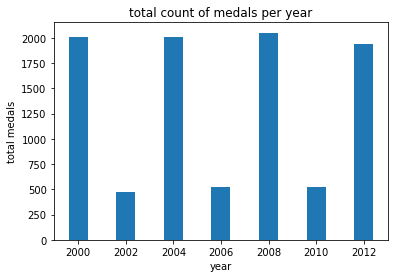

In [ ]:
import matplotlib.pyplot as plt     # visualizing data for numbber of medals freach year
dfplot = df1.groupBy('year').sum('total_medal')
x = dfplot.toPandas()['year'].values.tolist()
y = dfplot.toPandas()['sum(total_medal)'].values.tolist()
plt.bar(x,y)
plt.title('total count of medals per year')
plt.xlabel('year')
plt.ylabel('total medals')
plt.show()

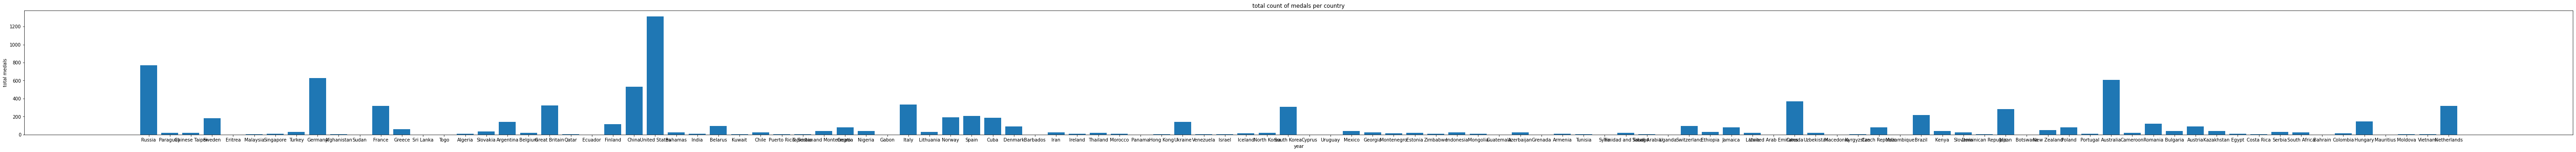

In [ ]:
dfplot1 = df1.groupBy('country').sum('total_medal')
x = dfplot1.toPandas()['country'].values.tolist()
y = dfplot1.toPandas()['sum(total_medal)'].values.tolist()
plt.figure(figsize=(100,5))
plt.bar(x,y)
plt.title('total count of medals per country')
plt.xlabel('year')
plt.ylabel('total medals')
plt.show()

In [ ]:
df1.stat.cov('age','total_medal')  # covariance between 2 columns

-0.15099280680987004

It is negatively correlated. when age more, u will get less medals.

In [ ]:
df1.stat.corr('age','gold_medal')  # correlation betwen age & geting gold medal

-0.02955324132937454

it is negatively correlated

In [ ]:
df1.stat.crosstab('age','gold_medal').show()

+--------------+---+---+---+---+---+---+---+
|age_gold_medal|  0|  1|  2|  3|  4|  6|  8|
+--------------+---+---+---+---+---+---+---+
|            56|  1|  0|  0|  0|  0|  0|  0|
|            42| 13|  7|  0|  0|  0|  0|  0|
|            24|454|244| 16|  3|  0|  0|  0|
|            37| 38| 15|  0|  0|  0|  0|  0|
|            25|441|224| 17|  1|  0|  0|  0|
|            52|  1|  1|  0|  0|  0|  0|  0|
|            20|208|106| 10|  5|  0|  0|  0|
|            46| 12|  3|  0|  0|  0|  0|  0|
|            29|354|162|  8|  2|  0|  0|  0|
|            61|  1|  0|  0|  0|  0|  0|  0|
|            28|425|217|  7|  1|  1|  0|  0|
|            38| 29| 21|  1|  0|  0|  0|  0|
|            21|313|134|  9|  2|  0|  0|  0|
|            33|136| 78|  3|  0|  0|  0|  0|
|            41| 15|  3|  0|  0|  0|  0|  0|
|            32|197|105|  6|  1|  0|  0|  0|
|            34|124| 52|  3|  0|  0|  0|  0|
|            45| 10|  2|  1|  0|  0|  0|  0|
|            17| 47| 23|  3|  2|  1|  0|  0|
|         

In [ ]:
freq = df1.stat.freqItems(('name','country','year','total_medal'),0.3)  # it shows min 30% present in data
freq.collect()

[Row(name_freqItems=['Jake Kaminski'], country_freqItems=['Norway', 'United States', 'Russia'], year_freqItems=[2012, 2008, 2004], total_medal_freqItems=[2, 1, 3])]

Jake Kaminski is most frequent player. Norway, Uited States, Russia are countries won medals most of time.2012,2008.2004 are years, in which medasa won more. mostly player won 1,2 or 3 total medals ,most of time. 

In [ ]:
#it is like IQR
Quantileprobs = [0.25,0.5, 0.75, 0.9]
relError =0.05  # this much erro is okay, it reduce time for execution
df1.stat.approxQuantile('age',Quantileprobs,relError)

[23.0, 26.0, 29.0, 31.0]

In [ ]:
df1.stat.approxQuantile('gold_medal',Quantileprobs,relError)

[0.0, 0.0, 1.0, 1.0]

In [ ]:
df1.stat.approxQuantile('brone_medal',Quantileprobs,relError)

[0.0, 0.0, 1.0, 1.0]

In [ ]:
df1.stat.approxQuantile('silver_medal',Quantileprobs,relError)

[0.0, 0.0, 1.0, 1.0]

In [ ]:
df1.stat.approxQuantile('total_medal',Quantileprobs,relError)

[1.0, 1.0, 1.0, 1.0]

In [ ]:
# to find age symmetric or skewed
df1.agg({'age':'skewness'}).show()

+------------------+
|     skewness(age)|
+------------------+
|0.8588574589372446|
+------------------+



If skewnes value  betwen 0.5 to 1. It shows moderately skewed. so we need to apply square root transformation.

In [ ]:
df1 =df1.withColumn('Age_trans',f.sqrt('age'))
df1.columns

['Name',
 'age',
 'country',
 'year',
 'sports',
 'gold_medal',
 'silver_medal',
 'brone_medal',
 'total_medal',
 'Date',
 'Age_trans']

In [ ]:
df1.agg({'age':'stddev'}).show()

+-----------------+
|      stddev(age)|
+-----------------+
|5.102118191961385|
+-----------------+



In [ ]:
df1.agg({'total_medal':'stddev'}).show()

+-------------------+
|stddev(total_medal)|
+-------------------+
|0.40900273140259247|
+-------------------+



In [ ]:
df1.agg({'gold_medal':'stddev'}).show()

+------------------+
|stddev(gold_medal)|
+------------------+
|0.5454363359989107|
+------------------+



In [ ]:
df1.agg({'brone_medal':'stddev'}).show()

+-------------------+
|stddev(brone_medal)|
+-------------------+
| 0.5050694967667286|
+-------------------+



In [ ]:
df1.agg({'silver_medal':'stddev'}).show()

+--------------------+
|stddev(silver_medal)|
+--------------------+
|  0.5115310349685307|
+--------------------+



In [ ]:
df1.select('Name','age','Age_trans').show(5)

+--------------------+---+-----------------+
|                Name|age|        Age_trans|
+--------------------+---+-----------------+
|           Wang Meng| 20| 4.47213595499958|
|          Rita König| 23|4.795831523312719|
|       Botond Storcz| 25|              5.0|
|Ole Einar Bjørndalen| 36|              6.0|
|       Roser Tarragó| 19|4.358898943540674|
+--------------------+---+-----------------+
only showing top 5 rows



we performed transformation, to make age column symmetric

In [ ]:
df1.columns

['Name',
 'age',
 'country',
 'year',
 'sports',
 'gold_medal',
 'silver_medal',
 'brone_medal',
 'total_medal',
 'Date',
 'Age_trans']

Now, our data is completely cleaned.

In [ ]:
df_clean = df1.select('Name','age','country','year','sports','gold_medal','silver_medal','brone_medal','total_medal','Age_trans')
df_clean.show()


+--------------------+---+--------------------+----+--------------------+----------+------------+-----------+-----------+------------------+
|                Name|age|             country|year|              sports|gold_medal|silver_medal|brone_medal|total_medal|         Age_trans|
+--------------------+---+--------------------+----+--------------------+----------+------------+-----------+-----------+------------------+
|           Wang Meng| 20|               China|2006|Short-Track Speed...|         1|           1|          1|          3|  4.47213595499958|
|          Rita König| 23|             Germany|2000|             Fencing|         0|           1|          1|          2| 4.795831523312719|
|       Botond Storcz| 25|             Hungary|2000|            Canoeing|         2|           0|          0|          2|               5.0|
|Ole Einar Bjørndalen| 36|              Norway|2010|            Biathlon|         1|           1|          0|          2|               6.0|
|       Roser

As we dont use date column in answering questions. i simply didnt take it to further analysis. i just take necassary columns and saving as olympics csv file format.this data is used to further analysis.

In [ ]:
df_clean.repartition(1).write.csv("Olympix_Data.csv", sep='|',header=True)

To save our daat all in one file, we need to use repartition.

# Data Analysis


# Write PySpark code to read the olympix_data.csv file

In [3]:
dfo = spark.read.format('csv').option('header','true').option('inferschema','true').option('sep','|').load('/content/Olympix_Data.csv')
dfo.show()

+--------------------+---+--------------------+----+--------------------+----------+------------+-----------+-----------+------------------+
|                Name|age|             country|year|              sports|gold_medal|silver_medal|brone_medal|total_medal|         Age_trans|
+--------------------+---+--------------------+----+--------------------+----------+------------+-----------+-----------+------------------+
|           Wang Meng| 20|               China|2006|Short-Track Speed...|         1|           1|          1|          3|  4.47213595499958|
|          Rita König| 23|             Germany|2000|             Fencing|         0|           1|          1|          2| 4.795831523312719|
|       Botond Storcz| 25|             Hungary|2000|            Canoeing|         2|           0|          0|          2|               5.0|
|Ole Einar Bjørndalen| 36|              Norway|2010|            Biathlon|         1|           1|          0|          2|               6.0|
|       Roser

We created new spark dataframe with cleaned data csv file.

# Write PySpark code to print the Olympic Sports/games in the dataset.

In [5]:
dfo.select('sports').distinct().show()

+--------------------+
|              sports|
+--------------------+
|          Gymnastics|
|              Tennis|
|              Boxing|
|Short-Track Speed...|
|          Ice Hockey|
|              Rowing|
|                Judo|
|            Softball|
|             Sailing|
|            Swimming|
|       Alpine Skiing|
|          Basketball|
|            Handball|
| Rhythmic Gymnastics|
|            Biathlon|
|           Triathlon|
|           Badminton|
|           Athletics|
|      Figure Skating|
|    Beach Volleyball|
+--------------------+
only showing top 20 rows



These are the sports in olympics

# Write PySpark code to plot the total number of medals in each Olympic Sport/game

In [7]:
import matplotlib.pyplot as plt


total number of medals in each sport
+--------------------+----------------+
|              sports|sum(total_medal)|
+--------------------+----------------+
|          Gymnastics|             282|
|              Tennis|              78|
|              Boxing|             188|
|Short-Track Speed...|             138|
|          Ice Hockey|             384|
|              Rowing|             576|
|                Judo|             224|
|            Softball|             134|
|             Sailing|             210|
|            Swimming|             765|
|       Alpine Skiing|              90|
|          Basketball|             287|
|            Handball|             351|
| Rhythmic Gymnastics|              84|
|            Biathlon|             138|
|           Triathlon|              24|
|           Badminton|              96|
|           Athletics|             753|
|      Figure Skating|              54|
|    Beach Volleyball|              48|
+--------------------+----------------+
onl

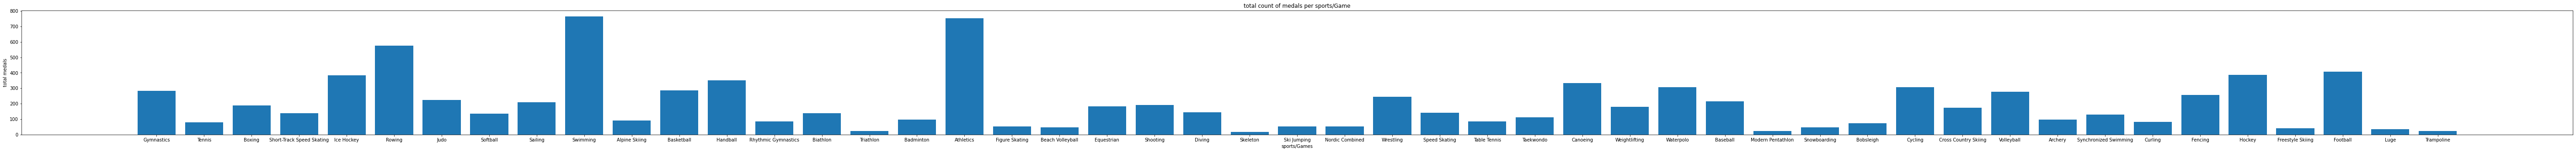

In [8]:
dfplot1 = dfo.groupBy('sports').sum('total_medal') # total medals in each sport
print('total number of medals in each sport')
dfplot1.show()
x = dfplot1.toPandas()['sports'].values.tolist()  # converting to list to plt using pandas
y = dfplot1.toPandas()['sum(total_medal)'].values.tolist()
plt.figure(figsize=(100,5))  # size of figure
plt.bar(x,y)   # category vs numerical, so bar is best
plt.title('total count of medals per sports/Game')  # title
plt.xlabel('sports/Games')
plt.ylabel('total medals')
plt.show()   # to display plot

# Sort the result based on the total number of medals.

In [11]:
dfplot1.orderBy(col('sum(total_medal)').desc()).show()    # to sort numer of medals

+----------+----------------+
|    sports|sum(total_medal)|
+----------+----------------+
|  Swimming|             765|
| Athletics|             753|
|    Rowing|             576|
|  Football|             407|
|    Hockey|             386|
|Ice Hockey|             384|
|  Handball|             351|
|  Canoeing|             333|
| Waterpolo|             306|
|   Cycling|             306|
|Basketball|             287|
|Gymnastics|             282|
|Volleyball|             278|
|   Fencing|             256|
| Wrestling|             245|
|      Judo|             224|
|  Baseball|             216|
|   Sailing|             210|
|  Shooting|             192|
|    Boxing|             188|
+----------+----------------+
only showing top 20 rows



# Find the total number of medals won by each country in swimming.

In [12]:
df_swim = dfo.filter(dfo.sports=='Swimming')  # filter df for swimming sport only
print('swimming sport df')
df_swim.show()   #display swimming sport df
print('Total number of medals by each country in swimming')
df_swim.groupBy('country').sum('total_medal').show()   # how many medals for each country in swimming sport

swimming sport df
+--------------------+---+-------------+----+--------+----------+------------+-----------+-----------+------------------+
|                Name|age|      country|year|  sports|gold_medal|silver_medal|brone_medal|total_medal|         Age_trans|
+--------------------+---+-------------+----+--------+----------+------------+-----------+-----------+------------------+
|     Yevgeny Lagunov| 22|       Russia|2008|Swimming|         0|           1|          0|          1|  4.69041575982343|
|           Ye Shiwen| 16|        China|2012|Swimming|         2|           0|          0|          2|               4.0|
|            Ed Moses| 20|United States|2000|Swimming|         1|           1|          0|          2|  4.47213595499958|
|             Tang Yi| 19|        China|2012|Swimming|         0|           0|          1|          1| 4.358898943540674|
|      Davis Tarwater| 28|United States|2012|Swimming|         1|           0|          0|          1| 5.291502622129181|
|     

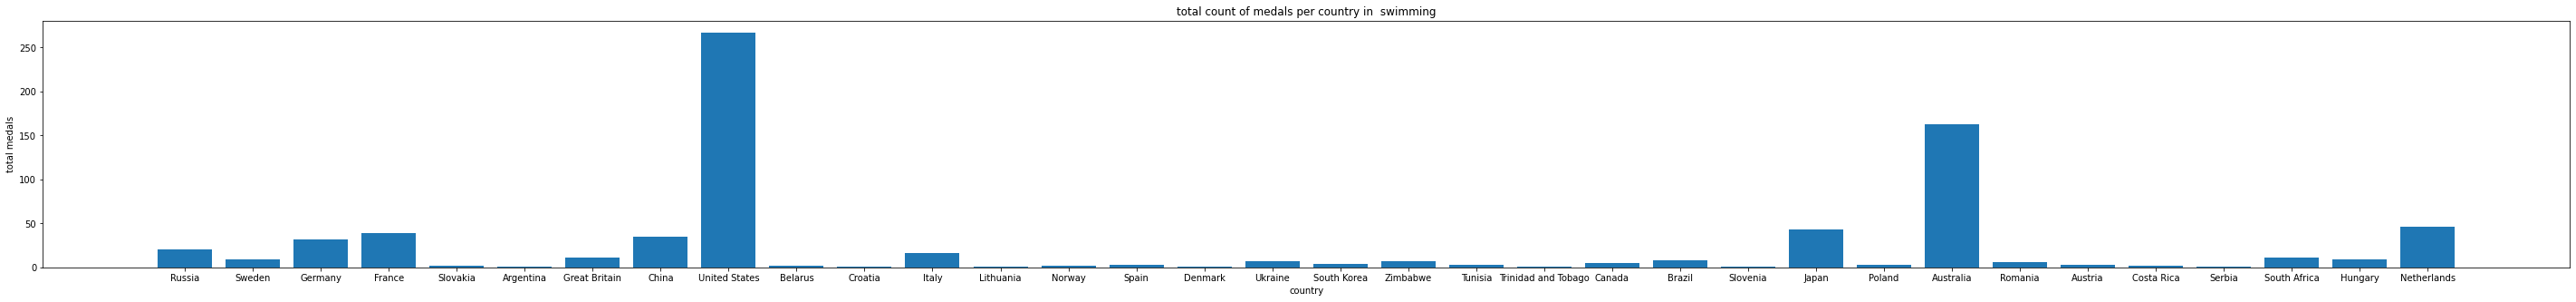

In [13]:
dfplot1 = df_swim.groupBy('country').sum('total_medal')   # plot swimming sport country vs medals
x = dfplot1.toPandas()['country'].values.tolist()  # conevrt to list using panads
y = dfplot1.toPandas()['sum(total_medal)'].values.tolist()
plt.figure(figsize=(50,5))  # figure size
plt.bar(x,y)  # category vs numerical, so bar is bes to use
plt.title('total count of medals per country in  swimming')
plt.xlabel('country')
plt.ylabel('total medals')
plt.show()

# Find the total number of medals won by each country in Skeleton.

Total number of medals won by each country in skelton
+-------------+----------------+
|      country|sum(total_medal)|
+-------------+----------------+
|       Russia|               1|
|      Germany|               2|
|Great Britain|               3|
|United States|               3|
|  Switzerland|               3|
|       Latvia|               1|
|       Canada|               4|
|      Austria|               1|
+-------------+----------------+



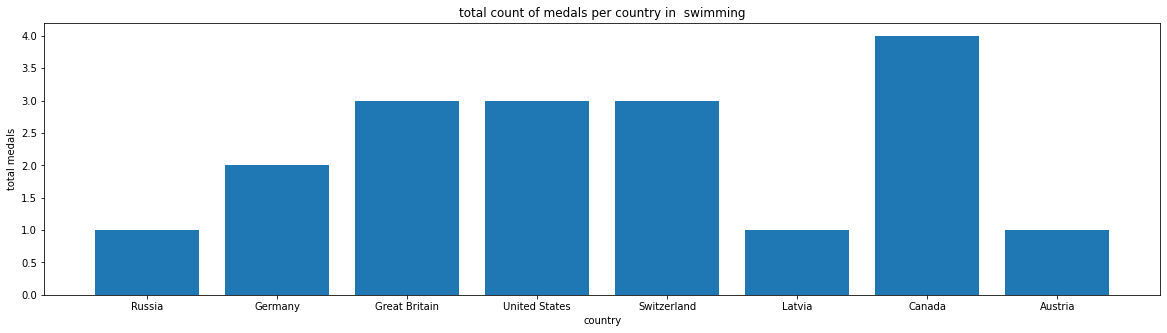

In [14]:
df_skel = dfo.filter(dfo.sports=='Skeleton')  # filter df for skelton game
dfplot1 = df_skel.groupBy('country').sum('total_medal')  # number of medals per country
print('Total number of medals won by each country in skelton')
dfplot1.show()
x = dfplot1.toPandas()['country'].values.tolist()  # converting to list using pandas
y = dfplot1.toPandas()['sum(total_medal)'].values.tolist()
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.title('total count of medals per country in  swimming')
plt.xlabel('country')
plt.ylabel('total medals')
plt.show()

# Find the number of medals that the US won yearly.

+--------------------+---+-------------+----+---------------+----------+------------+-----------+-----------+------------------+
|                Name|age|      country|year|         sports|gold_medal|silver_medal|brone_medal|total_medal|         Age_trans|
+--------------------+---+-------------+----+---------------+----------+------------+-----------+-----------+------------------+
|       Crystl Bustos| 23|United States|2000|       Softball|         1|           0|          0|          1| 4.795831523312719|
|            Ed Moses| 20|United States|2000|       Swimming|         1|           1|          0|          2|  4.47213595499958|
|      Davis Tarwater| 28|United States|2012|       Swimming|         1|           0|          0|          1| 5.291502622129181|
|       Gabe Woodward| 25|United States|2004|       Swimming|         0|           0|          1|          1|               5.0|
|      Jonathan McKee| 40|United States|2000|        Sailing|         0|           0|          1|

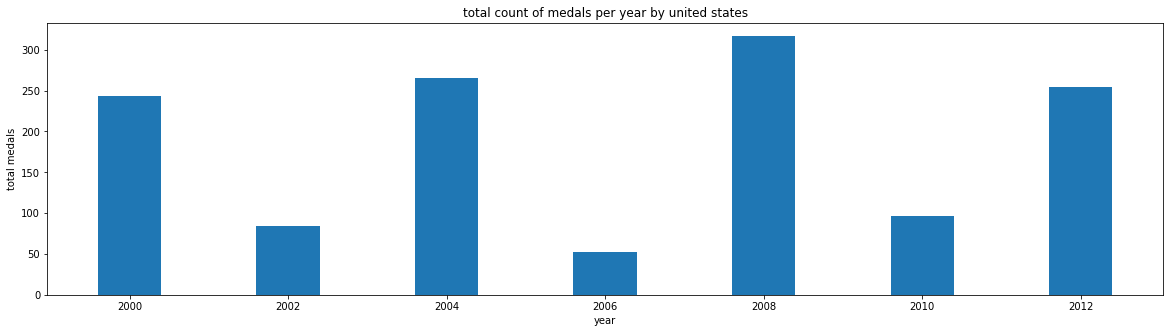

In [16]:
df_us = dfo.filter(dfo.country=='United States')  # fitering for united states only
df_us.show()
dfplot1 = df_us.groupBy('year').sum('total_medal')  # group by year
print('number of medals that US won yearly')
dfplot1.show()
x = dfplot1.toPandas()['year'].values.tolist()  # converting to list
y = dfplot1.toPandas()['sum(total_medal)'].values.tolist()
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.title('total count of medals per year by united states')
plt.xlabel('year')
plt.ylabel('total medals')
plt.show()

# Find the total number of medals won by each country.

total number of medals won by each country
+--------------+----------------+
|       country|sum(total_medal)|
+--------------+----------------+
|        Russia|             768|
|      Paraguay|              17|
|Chinese Taipei|              20|
|        Sweden|             181|
|       Eritrea|               1|
|      Malaysia|               3|
|     Singapore|               7|
|        Turkey|              28|
|       Germany|             629|
|   Afghanistan|               2|
|         Sudan|               1|
|        France|             318|
|        Greece|              59|
|     Sri Lanka|               1|
|          Togo|               1|
|       Algeria|               8|
|      Slovakia|              35|
|     Argentina|             139|
|       Belgium|              18|
| Great Britain|             322|
+--------------+----------------+
only showing top 20 rows



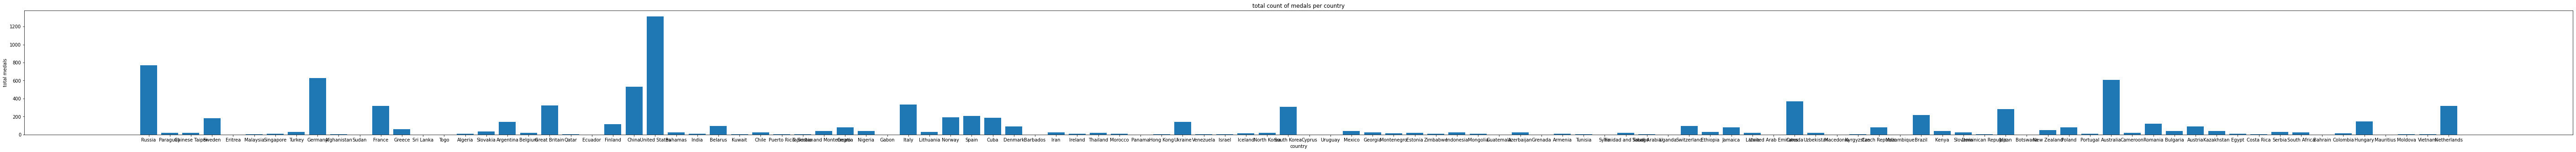

In [17]:
dfplot1 = dfo.groupBy('country').sum('total_medal')  # total medals per country
print('total number of medals won by each country')
dfplot1.show()
x = dfplot1.toPandas()['country'].values.tolist()   # converting to list
y = dfplot1.toPandas()['sum(total_medal)'].values.tolist()
plt.figure(figsize=(100,5))
plt.bar(x,y)
plt.title('total count of medals per country')
plt.xlabel('country')
plt.ylabel('total medals')
plt.show()

# Who was the oldest athlete in the olympics? Which country was he/she from?

In [24]:
from pyspark.sql.functions import desc

In [28]:
dfo.orderBy(col('age').desc()).show(5)

+-------------+---+-------------+----+----------+----------+------------+-----------+-----------+------------------+
|         Name|age|      country|year|    sports|gold_medal|silver_medal|brone_medal|total_medal|         Age_trans|
+-------------+---+-------------+----+----------+----------+------------+-----------+-----------+------------------+
|   Ian Millar| 61|       Canada|2008|Equestrian|         0|           1|          0|          1| 7.810249675906654|
|    Mark Todd| 56|  New Zealand|2012|Equestrian|         0|           0|          1|          1| 7.483314773547883|
|     Mac Cone| 55|       Canada|2008|Equestrian|         0|           1|          0|          1| 7.416198487095663|
| Nick Skelton| 54|Great Britain|2012|Equestrian|         1|           0|          0|          1|7.3484692283495345|
|Peter Charles| 52|Great Britain|2012|Equestrian|         1|           0|          0|          1| 7.211102550927978|
+-------------+---+-------------+----+----------+----------+----

Ian Miller is the oldest athelete with age of 61 from country Canada in sports Equestrain win silver medal in year 2008.

# Conclusion:
We have done this project in 2 parts. 
**part1: Spark dataframe cleaning**
**part2: spark dataframe analysis by answering questions.**
**Part1**: First we install pyspark and created spark session in name of capstone after intialized spark context. we read given csv file into spark dataframe. we did basic exploration of data. we read columns, printschema, null values, duplicates. we cleaned data and store in Olympix_Data.csv.
**Part2**: Again this file we read into spark dataframe. we analyze data & got insights from finding number of medals won by each country. number of medals won by us yearly. number of medals in skelton, swimming from all countries.number of medals in each sport. sports palyed in olympics.We plot for total number of medals for each sport & for each country. we find for swimming & skelton sport. we find for united states. Ian miller is the oldest athelete won silver medal from canada.


**Author** : Harsha Veena

**Created on** : 9:7:2022

**Language** : pyspark

**IDE** : Google colab

**Libraries** : pyspark,matplotlib, seaborn,pandas, pyspark.sql.functions, pyspark.sql.types,

**Functions** : show(), columns,drop,groupby(), desc, col, agg, skewness, stat, stat.corr,stat.cov,toPandas(), filter, select, write.csv(), sum,regexp_replace, withColumn, to_date,  values.tolist(), stat.freqItems, stat.crosstab , approxQuantile

**Purpose** : Capstone project

**Data Collected** : OdinSchool 